# Weidlich-Lux Model

We defines a function simu_x to run the simulation, given a set of parameters and the number of observations. The function initializes the states of N*2 agents and iterates over a specified number of observation points. At each point, it calculates the average opinion state and updates the states based on computed transition probabilities.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simu_x(nb_obs, deltat, N, v, a0, a1):
    # Initialize states randomly to 1 or -1
    Nt = np.random.choice([1, -1], size=N*2)

    X = []
    for obs in range(nb_obs):
        xt = np.mean(Nt)
        X.append(xt)

        U_ = a0 + a1 * xt
        p_bear = v * np.exp(-U_) * deltat
        p_bull = v * np.exp(U_) * deltat

        # Update states based on probabilities
        transitions = np.random.rand(N*2)
        Nt = np.where(Nt == 1, np.where(transitions < p_bear, -1, 1),
                          np.where(transitions < p_bull, 1, -1))

    return X


The results are visualized using matplotlib, with line plots for the time series data and histograms for the state distributions under different parameter sets.

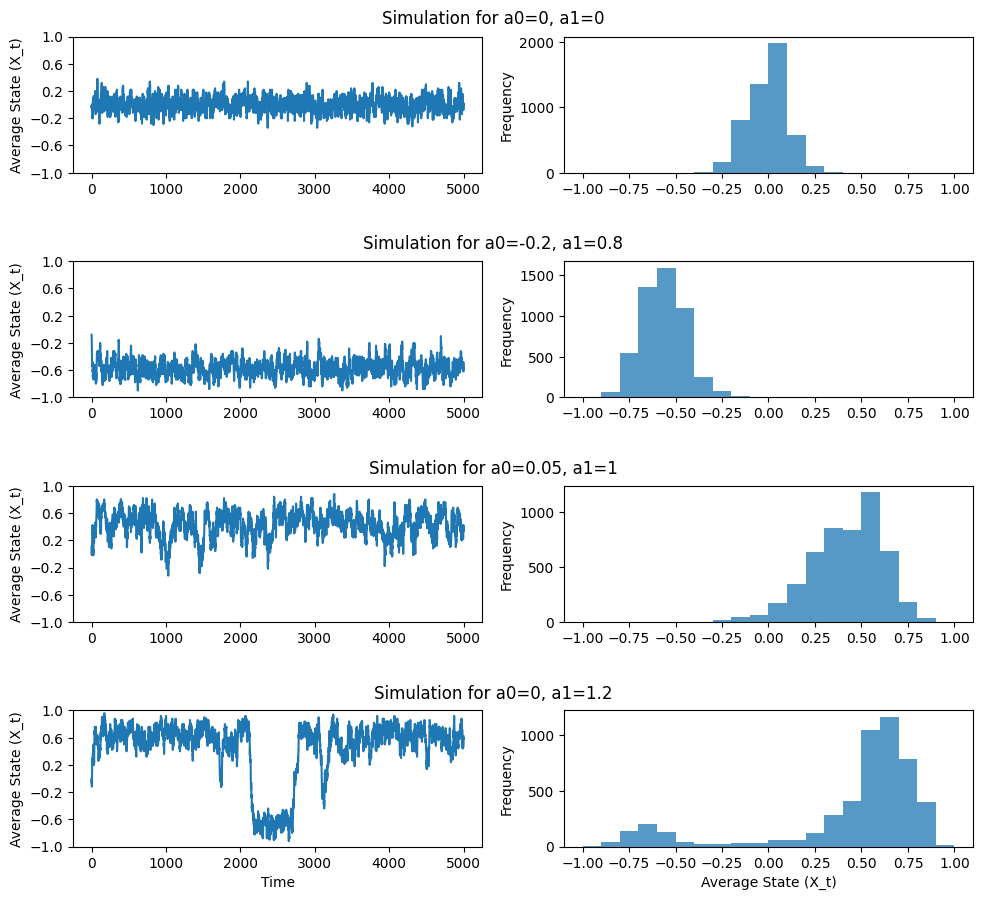

In [8]:
# Parameters
nb_obs = 5000
deltat = 0.5
N = 50
v = 0.2

params = [(0, 0), (-0.2, 0.8), (0.05, 1), (0, 1.2)]

fig = plt.figure(figsize=(10, 9))  # Adjusted figure size

# Line plots
for i, (a0, a1) in enumerate(params, 1):
    ax = plt.subplot(4, 2, 2*i-1)
    X = simu_x(nb_obs, deltat, N, v, a0, a1)
    plt.plot(X)
    if i < 4:  # Remove x-axis labels and legends for all but the last row
        ax.set_xlabel('')
    else:
        plt.xlabel('Time')
    plt.ylabel('Average State (X_t)')
    plt.ylim(-1, 1)
    plt.yticks(np.arange(-1, 1.1, 0.4))

    ax = plt.subplot(4, 2, 2*i)
    plt.hist(X, bins=20, alpha=0.75, range=(-1, 1))
    if i < 4:  # Remove x-axis labels and legends for all but the last row
        ax.set_xlabel('')
    else:
        plt.xlabel('Average State (X_t)')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(-1, 1.25, 0.25))

# Add row subtitles
row_subtitles = [f'Simulation for a0={a0}, a1={a1}' for a0, a1 in params]
for i, title in enumerate(row_subtitles, 1):
    fig.text(0.5, 0.98 - (i-1) * 0.25, title, ha='center', va='center', fontsize='large')

plt.subplots_adjust(bottom=0.06, right=0.98, left=0.08, top=0.96, hspace=0.65)
plt.savefig("figures/weidlich-lux_model_plots.pdf")
plt.show()
